# Imports 

In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from scipy.fft import dct, idct
import scipy.sparse.linalg
import numpy as np
import pickle as pkl
from PIL import Image as im 

# Data Imports

In [ ]:
# %%capture
!pip install -U gdown scipy
!gdown 1mTtEMU0QhCBucJPQsveBnZzf_e_03DTj
!unzip -o lab10data.zip

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=e7c0479cec389b2254510f32c74c0f3dd651d240353d782133043aa2081986e6
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have

Downloading...
From: https://drive.google.com/uc?id=1mTtEMU0QhCBucJPQsveBnZzf_e_03DTj
To: /content/lab10data.zip
100% 445M/445M [00:02<00:00, 164MB/s]
Archive:  lab10data.zip
  inflating: lab10data/lab10data.pkl  
  inflating: lab10data/README.txt    


# Section 1.1

In [ ]:
class K_eigenvectors():
  def __init__(self, X, K):
    self.X = X
    self.K = K
  
  def solve(self):
    L, V = scipy.sparse.linalg.eigs(self.X, k=self.K)
    return V[:, 0:self.K]

In [ ]:
dictionary = pkl.load(open('lab10data/lab10data.pkl', 'rb'))
faces = dictionary['faces']
mu = dictionary['mu']
sigma = dictionary['sigma']

K = 20

eig_obj = K_eigenvectors(sigma, K)
K_eig = eig_obj.solve()
print('Unitary Check: ', np.allclose(np.eye(K), np.matmul(np.conj(np.transpose(K_eig)), K_eig)))

Unitary Check:  True


# Section 1.2

In [ ]:
# roll eigenvectors back into 2D array (image) 

class EigenfaceDecomposition(): 
  def __init__(self, face, mu, eigenfaces):
    self.x = np.ravel(face, 'F')   # return 1D array (eigenface)
    self.mu = np.ravel(mu, 'F')    # mean face
    self.V = eigenfaces

  def solve(self):
    return np.matmul(np.conj(np.transpose(self.V)), self.x-self.mu)

# test EigenfaceDecomposition
face_idx = 20

eigendec_obj = EigenfaceDecomposition(faces[:,:,face_idx], mu, K_eig)
coefficients = eigendec_obj.solve()
print('The coefficients of the ', K, ' principal components are:', coefficients)

The coefficients of the  20  principal components are: [ 1917.20199986+0.j  -106.14949791+0.j  -291.25158972+0.j
 -1034.52646364+0.j  -185.66734993+0.j    -2.94147084+0.j
  -648.8307638 +0.j  -490.77873374+0.j   299.87449754+0.j
  -510.2305514 +0.j   467.52796913+0.j    20.46434852+0.j
  -444.77503753+0.j  -264.55116393+0.j  -191.8209542 +0.j
   245.24374973+0.j  -465.1702159 +0.j   258.76446606+0.j
   503.40083191+0.j    36.73798832+0.j]


# Section 2.1

In [ ]:
class Reconstruction():
  def __init__(self, mu, eigens, coeff):
    self.mu = np.ravel(mu, 'F')
    self.K = eigens.shape[1]
    self.V = eigens
    self.w = coeff
  
  def solve(self):
    return np.transpose((np.abs(np.matmul(self.V,self.w) + self.mu)).reshape((92, 112)))

Unitary Check:  True


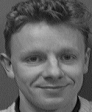

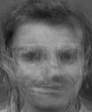

Error energy:  3012337.72513346
Error energy for K = 0:  10022785.089375002
Error reduction:  0.69945103099868
Unitary Check:  True


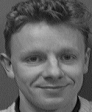

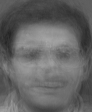

Error energy:  5146309.007875408
Error energy for K = 0:  10022785.089375002
Error reduction:  0.4865390246338885
Unitary Check:  True


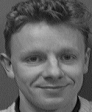

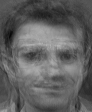

Error energy:  2737830.760827774
Error energy for K = 0:  10022785.089375002
Error reduction:  0.726839322961229
Unitary Check:  False


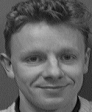

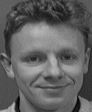

Error energy:  9.470343072324966e-22
Error energy for K = 0:  10022785.089375002
Error reduction:  1.0


In [ ]:
Ks = [20, 5, 25, 50]

for K in Ks:
  eig_obj = K_eigenvectors(sigma, K)
  K_eig = eig_obj.solve()
  print('Unitary Check: ', np.allclose(np.eye(K), np.matmul(np.conj(np.transpose(K_eig)), K_eig)))

  og_face = faces[:,:,face_idx]

  eigendec_obj = EigenfaceDecomposition(og_face, mu, K_eig)
  coefficients = eigendec_obj.solve()
  # print('The coefficients of the ', K, ' principal components are:', coefficients)

  recon_obj = Reconstruction(mu, K_eig, coefficients)
  recon_face = recon_obj.solve()

  image = im.fromarray(og_face.astype(np.uint8), mode='L')
  display(image)
  # image.show()
  # image.save("original.png")

  recon_image = im.fromarray(recon_face.astype(np.uint8), mode='L')
  display(recon_image)
  # recon_image.show()
  # recon_image.save("recon.png")

# Section 2.2

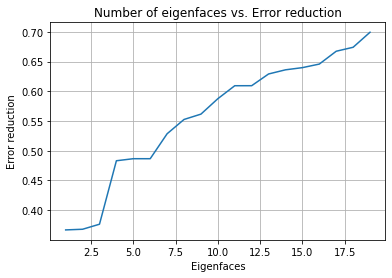

In [ ]:
Ks_list = list(range(1, 20))
Ks = [] 

for K in Ks_list:
  eig_obj = K_eigenvectors(sigma, K)
  K_eig = eig_obj.solve()

  og_face = faces[:,:,face_idx]

  eigendec_obj = EigenfaceDecomposition(og_face, mu, K_eig)
  coefficients = eigendec_obj.solve()

  recon_obj = Reconstruction(mu, K_eig, coefficients)
  recon_face = recon_obj.solve()
  energy_error_norm = np.linalg.norm(og_face - recon_face)
  energy_of_error = (energy_error_norm)**2 
  K0_norm = np.linalg.norm(og_face - mu)
  K0_error =  (K0_norm)**2
  error_reduction = ((K0_error-energy_of_error)/K0_error)
  Ks.append(error_reduction) 
plt.figure()
plt.grid(True)
plt.plot(Ks_list, Ks)
plt.title('Number of eigenfaces vs. Error reduction')
plt.xlabel('Eigenfaces')
plt.ylabel('Error reduction')
plt.show()  